In [31]:
import json
# import model_utility
import preprocess_filter
import glob
import matplotlib.pyplot as plt
# import albumentations as alb
import cv2
import tensorflow as tf
# import segmentation_models as sm

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize

import numpy as np
import re
from pathlib import Path
import math

import spoketools

In [32]:
filename,pixel_values =  preprocess_filter.apply_filters("../data/2023_rpjb/all/117_SPKMVLFHP_001/W1630344949_1_CALIB.rpjb")

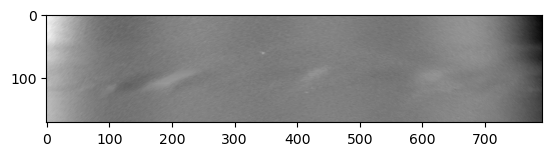

In [34]:
pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)
pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
pixel_values = spoketools.fft2lpf(pixel_values, passfiltrow = 0, passfiltcol = 3)

# preprocess_filter.save_image("../data/vis_for_talk/W1630344949.png", pixel_values)
plt.imshow(pixel_values, cmap = "gray")

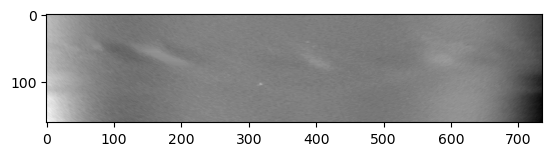

(1, 160, 736)


In [24]:
img_path = "../data/vis_for_talk/W1630344949.png"

img_list = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)]
plt.imshow(img_list[0], cmap = "gray")
plt.show()


img_list = normalize(np.array(img_list), axis=1)
print(img_list.shape)
img = img_list[0].reshape((1, 160, 736))

In [29]:
from tensorflow import keras

model_path = "../models/both/both_spoke_170im_300e_resnet34.h5"
model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", )

# print(type)
# print(training_size)
# print(epoch_num)

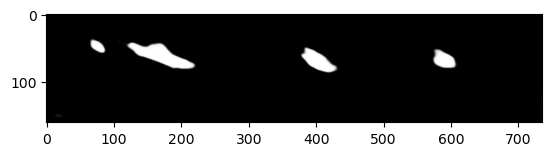

In [30]:
prediction = model.predict(img, verbose = False)
prediction = prediction.reshape((160, 736))
plt.imshow(prediction, cmap = "gray")